# Kde comparison with other libraries - in function of m

In [3]:
import time
import numpy as np
import matplotlib.pyplot as plt
from kdelearn.kde import KDE
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm
from scipy.stats import gaussian_kde

np.random.seed(0)

In [2]:
def kdelearn_kde(x_train, x_test):
    bandwidth = np.array([1.0])
    KDE("gaussian").fit(x_train, bandwidth=bandwidth).pdf(x_test)

def sklearn_kde(x_train, x_test):
    KernelDensity(bandwidth=1.0, kernel="gaussian").fit(x_train).score_samples(x_test)

def statsmodels_kde(x_train, x_test):
    sm.nonparametric.KDEUnivariate(x_train[:, 0]).fit(kernel="gau", bw=1.0).evaluate(x_test[:, 0])

def scipy_kde(x_train, x_test):
    gaussian_kde(x_train.T, bw_method=1.).evaluate(x_test.T)


kde_funcs = [kdelearn_kde, sklearn_kde, statsmodels_kde, scipy_kde]

kdelearn_kde
sklearn_kde
statsmodels_kde
scipy_kde


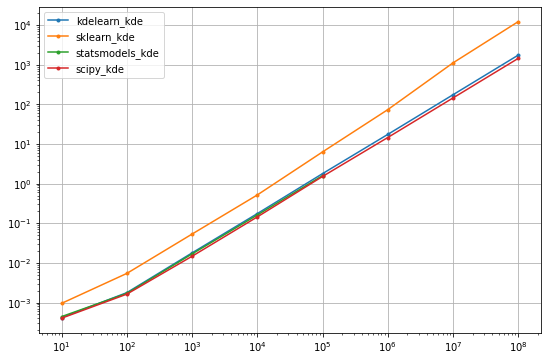

In [4]:
m_test = 1000
x_test = np.linspace(-4, 4, m_test)[:, None]
repeats = 5

plt.figure(figsize=(9, 6))

for fun in kde_funcs:
    avg_results = []
    m = []
    for m_train in [10 ** i for i in range(1, 9)]:  # 9 - max
        
        if fun.__name__ == "statsmodels_kde" and m_train >= 10 ** 6:
            break
        
        x_train = np.random.normal(0, 1, size=(m_train, 1))
        results = []
        for _ in range(repeats):
            start_time = time.time()
            fun(x_train, x_test)
            elapsed_time = time.time() - start_time
            results.append(elapsed_time)
        avg_results.append(np.mean(results))
        m.append(m_train)

    plt.plot(m, avg_results, ".-", label=fun.__name__)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

# Kde comparison with other libraries - in function of n

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from kdelearn.kde import KDE
from sklearn.neighbors import KernelDensity
import statsmodels.api as sm
from scipy.stats import gaussian_kde

np.random.seed(0)

In [2]:
def kdelearn_kde(x_train, x_test, n=None):
    bandwidth = np.full(n, 1.0)
    KDE("gaussian").fit(x_train, bandwidth=bandwidth).pdf(x_test)

def sklearn_kde(x_train, x_test, n=None):
    KernelDensity(bandwidth=1.0, kernel="gaussian").fit(x_train).score_samples(x_test)

# def statsmodels_kde(x_train, x_test, n=None):
#     sm.nonparametric.KDEUnivariate(x_train[:, 0]).fit(kernel="gau", bw=1.0).evaluate(x_test[:, 0])

def scipy_kde(x_train, x_test, n=None):
    gaussian_kde(x_train.T, bw_method=1.).evaluate(x_test.T)


kde_funcs = [kdelearn_kde, sklearn_kde, scipy_kde]

kdelearn_kde
sklearn_kde
scipy_kde


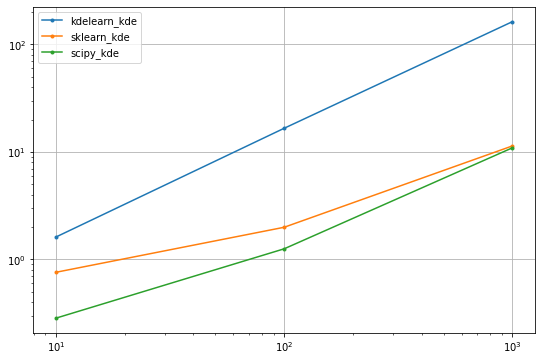

In [3]:
m_train = 10_000
m_test = 1000

repeats = 5

plt.figure(figsize=(9, 6))

for fun in kde_funcs:
    print(fun.__name__)
    avg_results = []
    ns = []
    for n in [10 ** i for i in range(1, 4)]:  # ?
        x_train = np.random.normal(0, 1, size=(m_train, n))
        x_test = np.random.uniform(-4, 4, (m_test, n))
        results = []
        for _ in range(repeats):
            start_time = time.time()
            fun(x_train, x_test, n)
            elapsed_time = time.time() - start_time
            results.append(elapsed_time)
        avg_results.append(np.mean(results))
        ns.append(n)

    plt.plot(ns, avg_results, ".-", label=fun.__name__)

plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()